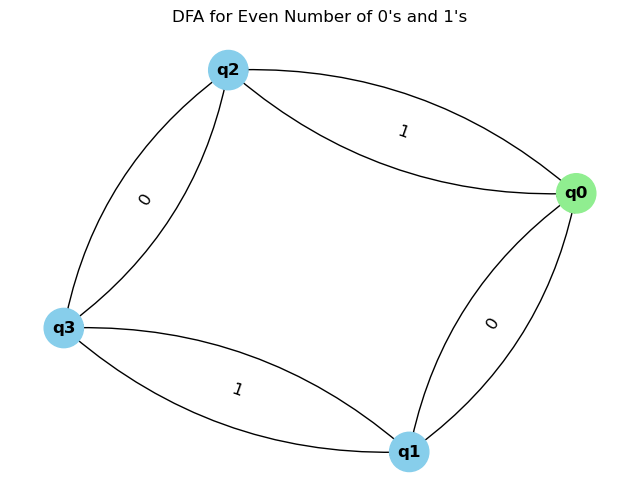

Start State: q0
Final States: {'q0'}
Transition Function:
  δ(q0, '0') -> q1
  δ(q0, '1') -> q2
  δ(q1, '0') -> q0
  δ(q1, '1') -> q3
  δ(q2, '0') -> q3
  δ(q2, '1') -> q0
  δ(q3, '0') -> q2
  δ(q3, '1') -> q1

DFA accepting strings with even number of 0's and 1's



Enter a binary string (or type 'exit' to quit):  1001


Input: '1001' -> Accepted



Enter a binary string (or type 'exit' to quit):  exit


Exiting...


In [1]:
# DFA with even number of 0s and 1s
import networkx as nx
import matplotlib.pyplot as plt

class DFA:
    def __init__(self):
        self.states = ["q0", "q1", "q2", "q3"]
        self.start_state = "q0"
        self.final_states = {"q0"}
        self.transitions = self.generate_transitions()
        
        self.states_binary = {
            "q00": {"0": "q10", "1": "q01"},
            "q01": {"0": "q11", "1": "q00"},
            "q10": {"0": "q00", "1": "q11"},
            "q11": {"0": "q01", "1": "q10"},
        }
        self.current_state = "q00"
        self.accept_state = "q00"

    def generate_transitions(self):
        transitions = {
            "q0": {"0": "q1", "1": "q2"},
            "q1": {"0": "q0", "1": "q3"},
            "q2": {"0": "q3", "1": "q0"},
            "q3": {"0": "q2", "1": "q1"},
        }
        return transitions

    def plot_dfa(self):
        G = nx.DiGraph()
        for state in self.states:
            G.add_node(state)
        edge_labels = {}
        for state, transitions in self.transitions.items():
            for symbol, target_state in transitions.items():
                G.add_edge(state, target_state)
                edge_labels[(state, target_state)] = symbol
        node_colors = ["lightgreen" if state in self.final_states else "skyblue" for state in self.states]
        pos = nx.spring_layout(G)
        plt.figure(figsize=(8, 6))
        nx.draw_networkx_nodes(G, pos, node_size=800, node_color=node_colors)
        nx.draw_networkx_edges(G, pos, arrows=True, connectionstyle="arc3,rad=0.2")
        nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
        plt.title("DFA for Even Number of 0's and 1's")
        plt.axis("off")
        plt.show()

    def display_dfa_details(self):
        print("Start State:", self.start_state)
        print("Final States:", self.final_states)
        print("Transition Function:")
        for state, transitions in self.transitions.items():
            for symbol, target_state in transitions.items():
                print(f"  δ({state}, '{symbol}') -> {target_state}")

    def reset(self):
        self.current_state = "q00"

    def process_input(self, binary_string):
        for symbol in binary_string:
            if symbol not in {"0", "1"}:
                print(f"Invalid input symbol: {symbol}")
                return False
            self.current_state = self.states_binary[self.current_state][symbol]
        return self.current_state == self.accept_state


dfa = DFA()
dfa.plot_dfa()
dfa.display_dfa_details()

print("\nDFA accepting strings with even number of 0's and 1's")
while True:
    binary_string = input("\nEnter a binary string (or type 'exit' to quit): ").strip()
    if binary_string.lower() == "exit":
        print("Exiting...")
        break

    result = "Accepted" if dfa.process_input(binary_string) else "Rejected"
    print(f"Input: '{binary_string}' -> {result}")
    dfa.reset()
